## Uporaba scikit-learn za regresijo

## Using scikit-learn for regression

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import numpy as np

Regresija v scikit-learn je zelo podobna klasifikaciji. Oba zahtevata označene podatke. Tako kot v klasifikaciji se regresija izvaja z učnimi algoritmi in regresijskimi modeli (regresorji). Regresijski učni algoritmi so objekti, ki sprejemajo podatke in vrnejo regresorje. Regresijski modeli dobijo podatke za napovedovanje vrednosti zveznega razreda:

Regression in scikit-learn is very similar to classification. Both require labeled data. Just like in classification, regression is implemented with learners and regression models (regressors). Regression learners are objects that accept data and return regressors. Regression models are given data items to predict the value of continuous class:

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)
learner = LinearRegression()
model = learner.fit(X, y)

print("predicted, observed:")
for i in range(3):
    print("%.1f, %.1f" % (model.predict(X[i].reshape(1, -1))[0], y[i]))

predicted, observed:
206.1, 151.0
68.1, 75.0
176.9, 141.0


Začnimo z regresijskimi drevesi. Spodaj je primer skripta, ki gradi drevo iz podatkov o pacientih in natisne drevo v obliki besedila:

Let us start with regression trees. Below is an example script that builds the tree from data on patients and prints out the tree in textual form:

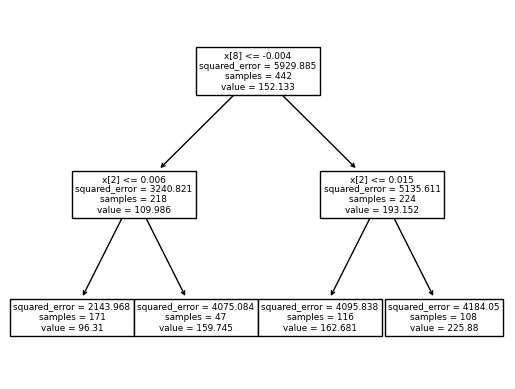

In [3]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree_learner = DecisionTreeRegressor(max_depth=2)
tree = tree_learner.fit(X, y)
plot_tree(tree);

Sledi inicializacija nekaterih drugih regresorjev in njihovo napovedovanje pet podatkovnih podatkov v podatkovnem nizu:

Following is initialization of a few other regressors and their prediction of five data instances in the dataset:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5, random_state=42)

lr = LinearRegression()
rf = RandomForestRegressor()
ridge = Ridge()

learners = [lr, rf, ridge]
regressors = [learner.fit(X_train, y_train) for learner in learners]

print("y     ", " ".join("%-15s" % l.__class__.__name__ for l in regressors))

for i in range(len(X_test)):
    print(("{:<9}" + " {:.3f}\t"*len(regressors)).format(
        y_test[i],
        *(r.predict(X_test[i].reshape(1, -1))[0] for r in regressors)    
    ))

y      LinearRegression RandomForestRegressor Ridge          
219.0     144.220	 154.430	 157.256	
70.0      176.810	 188.260	 162.408	
202.0     138.196	 151.550	 155.584	
230.0     288.565	 256.000	 251.309	
111.0     123.509	 112.120	 142.578	


##### Vprašanje 5-4-1
Z razsevnim diagramom prikaži, kako se vrednost napovedi spreminja glede na dejansko vrednost. Komentiraj sliko.

##### Question 5-4-1
Show the way the predicted value changes according to the actual value with a scatter plot. Comment this picture.

##### Vprašanje 5-4-2
Prikaži, kako se napaka napovedi spreminja glede na dejansko vrednost. Komentiraj sliko.

##### Question 5-4-2
Show how the prediction error changes according to the actual value. Comment this picture.

### Prečno preverjanje

### Cross-Validation

V scikit-learn imamo na voljo tudi metode za ocenjevanje in prečno preverjanje:

Evaluation and cross-validation methods are available in scikit-learn:

In [5]:
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import KFold
from collections import defaultdict

from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error


lr = LinearRegression()
rf = RandomForestRegressor()
ridge = Ridge()
mean = DummyRegressor()

regressors = [mean, lr, rf, ridge]

rmse = defaultdict(list)
r2 = defaultdict(list)


kf = KFold(n_splits=5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    for reg in regressors:
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        rmse[reg].append(root_mean_squared_error(y_test, y_pred))
        r2[reg].append(r2_score(y_test, y_pred))
        
print("Learner \t\t RMSE  R2")
for reg in regressors:
    print("{:23s} {:.2f} {:5.2f}".format(reg.__class__.__name__, np.array(rmse[reg]).mean(), np.array(r2[reg]).mean()))

Learner 		 RMSE  R2
DummyRegressor          77.26 -0.03
LinearRegression        54.69  0.48
RandomForestRegressor   58.37  0.41
Ridge                   58.45  0.41


Ni veliko razlike. Vsaka regresijska metoda ima nabor parametrov. Uporaljali smo jih s privzetimi parametri in nastavljanje parametrov bi pomagalo. Na seznam naših regresorjev smo vključili MeanLearner; ta regresor preprosto napoveduje srednjo vrednost iz učne množice in se uporabljajo kot izhodišče.

Not much difference here. Each regression method has a set of parameters. We have been running them with default parameters, and parameter fitting would help. Also, we have included MeanLearner in the list of our regressors; this regressor simply predicts the mean value from the training set, and is used as a baseline.